<a href="https://colab.research.google.com/github/RayNG123/MA575_bikesharing/blob/main/Ripley_K_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount to google drive working directory


In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

#mount to current working directory
import os
os.chdir('/content/drive/MyDrive/Uber_New/Ripley_K_function')

Mounted at /content/drive


#Install and import all packages needed

In [13]:
!pip install pointpats
!pip install ripleyk
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 33.7 MB/s eta 0:00:00


In [14]:
#utitlity to plot and process data
import pandas as pd
import numpy as np  
import scipy.stats as stat                                          
from matplotlib import pyplot as plt                    

#projection utitlity
from pyproj import CRS, Transformer
from shapely.geometry import Point, Polygon

#utitlity to computer ripley k automatically
import ripleyk     

#Read and preprocess data

In [20]:
data = pd.read_csv('data/full_data.csv', usecols = ['lat','lon'])
data.head(5)

,lat,lon
0,34.103273,-118.237237
1,34.090963,-118.090371
2,33.879878,-118.142976
3,33.831782,-118.087541
4,33.887245,-118.105441


###Our raw data utilizes latitude and longitude for geolocation coordinates, which are based on an Ellipsoidal 2D system. Direct application of this data with Ripley's K function could potentially yield inaccurate results. This is primarily due to the fact that the Earth, being an oblate spheroid, manifests as a sphere and not a flat plane, and the latitude and longitude values represent angles rather than actual distances.

###Therefore, we will project our raw data into a cartisean 2D based system, NAD83. The North American Datum of 1983, or NAD83, is a geodetic reference system used extensively for geospatial data in North America. It serves as a basis for accurately identifying positions and elevations across the continent, serving as a key reference for mapping, surveying, and geographic information system (GIS) applications.

###Such cartisean 2D based characteristic is suitable for calculating Ripley K function, which allow for euclidean distance to represent distance bewteen two points over the the 2D plain of interest.






In [21]:
#Source CRS (WGS 84)
#Latitude go west-east, Longitude go south-north
crs_wgs84 = CRS("EPSG:4326")

#Target CRS(NAD83) / California zone 5 (ftUS)
#State law defines system in US survey feet
crs_utm = CRS.from_string(f"EPSG:2229")

#transformer object to convert between the CRS
transformer = Transformer.from_crs(crs_wgs84, crs_utm)

#test
longitude =  -122.23
latitude = 38.084222
x, y = transformer.transform(latitude, longitude)

print(f"Cartesian coordinates: x={x}, y={y}")

Cartesian coordinates: x=5342501.7409183, y=3335444.274439519


In [23]:
transformed_lat_lon = [transformer.transform(lat,lon) for lat,lon in zip(data['lat'].tolist(), data['lon'].tolist())]
transformed_lat = np.array([i[0] for i in transformed_lat_lon])
transformed_lon = np.array([i[1] for i in transformed_lat_lon])

In [28]:
#1 foot = 0.0003048 kilometers
centered_lat = (transformed_lat - transformed_lat.mean())*0.0003048
centered_lon = (transformed_lon - transformed_lon.mean())*0.0003048

In [30]:
data['centered_lat'] = centered_lat
data['centered_lon'] = centered_lon

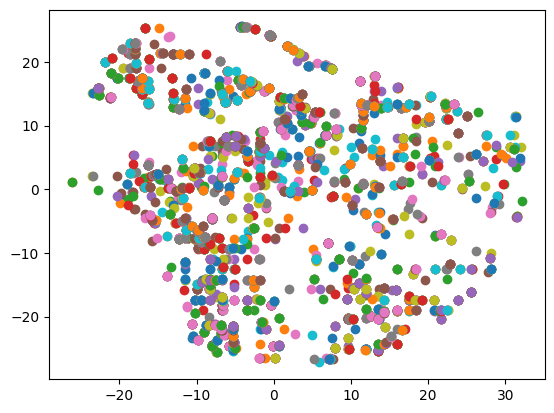

In [47]:
fig, ax = plt.subplots()

for point in points:
  ax.plot(point.x, point.y, 'o')

(-25.0, 10.0)

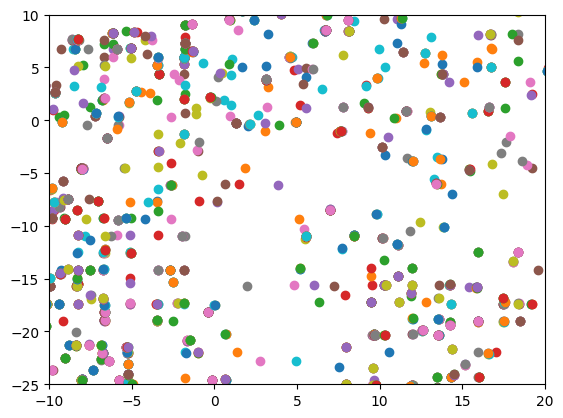

In [62]:
fig, ax = plt.subplots()

for point in points:
  ax.plot(point.x, point.y, 'o')

ax.set_xlim(-10, 20)
ax.set_ylim(-25, 10)

In [60]:
filtered = data[data['centered_lat'].between(-10,20) & data['centered_lon'].between(-25,10)]

In [56]:
data

,id,lat,lon,tags,centered_lat,centered_lon
0,192554739,34.103273,-118.237237,{'amenity': 'fuel'},3.242974,8.156837
1,274830997,34.090963,-118.090371,"{'amenity': 'fuel', 'brand': 'Chevron', 'brand...",16.793283,6.769265
2,297839095,33.879878,-118.142976,"{'amenity': 'fuel', 'created_by': 'Potlatch 0....",11.905372,-16.639246
3,298559251,33.831782,-118.087541,"{'amenity': 'fuel', 'brand': 'Chevron', 'brand...",17.029393,-21.980132
4,304911683,33.887245,-118.105441,"{'amenity': 'fuel', 'created_by': 'Potlatch 0....",15.378846,-15.826349
...,...,...,...,...,...,...
3374,7944152644,34.200957,-118.192237,{},7.415942,18.983281
3375,7944152645,34.200967,-118.192207,{},7.418681,18.984385
3376,7944152646,34.200967,-118.192182,{},7.421013,18.984381
3377,7944152647,34.200990,-118.192146,{},7.424354,18.986992


In [61]:
filtered

,id,lat,lon,tags,centered_lat,centered_lon
0,192554739,34.103273,-118.237237,{'amenity': 'fuel'},3.242974,8.156837
1,274830997,34.090963,-118.090371,"{'amenity': 'fuel', 'brand': 'Chevron', 'brand...",16.793283,6.769265
2,297839095,33.879878,-118.142976,"{'amenity': 'fuel', 'created_by': 'Potlatch 0....",11.905372,-16.639246
3,298559251,33.831782,-118.087541,"{'amenity': 'fuel', 'brand': 'Chevron', 'brand...",17.029393,-21.980132
4,304911683,33.887245,-118.105441,"{'amenity': 'fuel', 'created_by': 'Potlatch 0....",15.378846,-15.826349
...,...,...,...,...,...,...
3054,5417046420,34.102866,-118.091381,{},16.701257,8.089681
3055,5417046621,34.102864,-118.091167,{},16.720994,8.089518
3056,5417046622,34.103214,-118.091159,{},16.721832,8.128341
3057,5417046623,34.103262,-118.091211,{},16.717011,8.133636


In [40]:
points = [Point(lat,lon) for lat,lon in zip(centered_lat,centered_lon)]
gdf = gpd.GeoDataFrame(geometry=points)


,geometry
0,POINT (3.24297 8.15684)
1,POINT (16.79328 6.76926)
2,POINT (11.90537 -16.63925)
3,POINT (17.02939 -21.98013)
4,POINT (15.37885 -15.82635)
...,...
3374,POINT (7.41594 18.98328)
3375,POINT (7.41868 18.98439)
3376,POINT (7.42101 18.98438)
3377,POINT (7.42435 18.98699)


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from pointpats import PointPattern
from pointpats import K, Kenv
from scipy.spatial import Point
import seaborn

# Generate random point data
np.random.seed(12345)
npts = 100
pp = PointPattern(points)

# Compute K function
k = K(pp)

# Compute envelope (confidence intervals)
kenv = Kenv(pp, intervals=20)

# Plot
plt.plot(kenv[0][0], kenv[0][1], 'r', label="K Function")  # K function
plt.plot(kenv[0][0], kenv[0][2], 'b--')  # upper confidence limit
plt.plot(kenv[0][0], kenv[0][3], 'b--')  # lower confidence limit
plt.xlabel("r")
plt.ylabel("K(r)")
plt.title("Ripley's K Function")
plt.legend()
plt.show()

ImportError: ignored

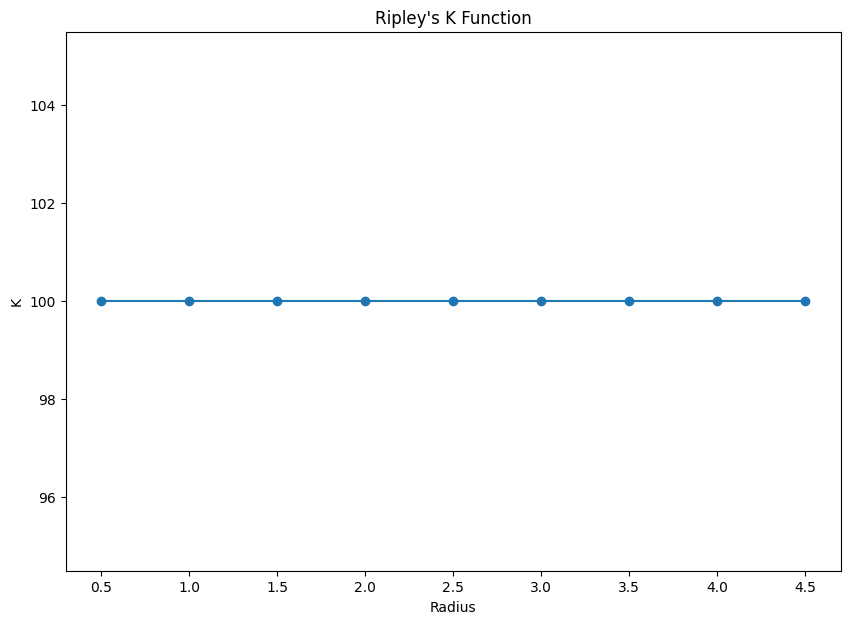

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Generate random points
np.random.seed(42)
num_points = 100
area_side = 10  # Area is 10x10 units
points = [Point(np.random.uniform(0, area_side), np.random.uniform(0, area_side)) for _ in range(num_points)]

# Create a geodataframe
gdf = gpd.GeoDataFrame(geometry=points)

# Define the study area
study_area = Polygon([(0, 0), (0, area_side), (area_side, area_side), (area_side, 0)])

# Calculate Ripley's K function
def ripley_K(data, study_area, r):
    # Number of points
    N = len(data)
    # Area of study region
    A = study_area.area
    # Density of points
    lambda_hat = N / A

    distances = data.distance(data.unary_union)
    weights = np.pi * r ** 2
    K_hat = A * np.sum(distances <= r) / (N * lambda_hat)
    return K_hat

# Define the radius range
r_values = np.arange(0.5, area_side/2, 0.5)
K_values = [ripley_K(gdf, study_area, r) for r in r_values]

# Plot Ripley's K
plt.figure(figsize=(10, 7))
plt.plot(r_values, K_values, marker='o')
plt.title("Ripley's K Function")
plt.xlabel('Radius')
plt.ylabel("K")
plt.show()